In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline


In [17]:
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile

In [2]:
df = pd.read_csv("data/merged.csv")

df.head()

,"Population, total (millions)",Population growth (annual %),Surface area (sq. km) (thousands),Population density (people per sq. km of land area),"GNI, Atlas method (current US$) (billions)","GNI per capita, Atlas method (current US$)","GNI, PPP (current international $) (billions)","GNI per capita, PPP (current international $)","Life expectancy at birth, total (years)","Fertility rate, total (births per woman)",...,Individuals using the Internet (% of population),Merchandise trade (% of GDP),Net barter terms of trade index (2000 = 100),Net migration (thousands),"Personal remittances, received (current US$) (millions)","Foreign direct investment, net inflows (BoP, current US$) (millions)",Net official development assistance received (current US$) (millions),Date,country,constitution
0,12.41,4.5,652.9,19.0,NaN,NaN,NaN,NaN,50.0,7.5,...,0.0,NaN,NaN,3076.0,NaN,0.0,122.7,1990,afghanistan,"in the name of god, the almighty and the just...."
1,20.78,3.0,652.9,31.8,NaN,NaN,NaN,NaN,56.0,7.5,...,0.0,63.0,100.0,744.0,NaN,0.0,136.0,2000,afghanistan,"in the name of god, the almighty and the just...."
2,29.19,2.7,652.9,44.7,14.86,510.0,50.01,1710.0,61.0,6.0,...,4.0,35.0,145.0,522.0,378.0,191.0,6235.3,2010,afghanistan,"in the name of god, the almighty and the just...."
3,38.93,2.3,652.9,59.6,19.32,500.0,81.65,2100.0,65.0,4.3,...,NaN,39.0,165.0,-315.0,789.0,23.0,4284.4,2020,afghanistan,"in the name of god, the almighty and the just...."
4,12.41,4.5,652.9,19.0,NaN,NaN,NaN,NaN,50.0,7.5,...,0.0,NaN,NaN,3076.0,NaN,0.0,122.7,1990,albania,NaN


In [3]:
# Describing all the Numerical Features
df.describe()

,"Population, total (millions)",Population growth (annual %),Surface area (sq. km) (thousands),Population density (people per sq. km of land area),"GNI, Atlas method (current US$) (billions)","GNI per capita, Atlas method (current US$)","GNI, PPP (current international $) (billions)","GNI per capita, PPP (current international $)","Life expectancy at birth, total (years)","Fertility rate, total (births per woman)",...,Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),Individuals using the Internet (% of population),Merchandise trade (% of GDP),Net barter terms of trade index (2000 = 100),Net migration (thousands),"Personal remittances, received (current US$) (millions)","Foreign direct investment, net inflows (BoP, current US$) (millions)",Net official development assistance received (current US$) (millions),Date
count,703.000000,703.000000,699.000000,701.000000,647.000000,647.000000,641.000000,640.000000,681.000000,684.000000,...,572.000000,692.000000,683.000000,657.000000,587.000000,668.000000,594.000000,673.000000,518.000000,704.000000
mean,35.011138,1.478236,719.597568,266.027104,314.591762,10109.891808,435.150218,14056.828125,68.575624,3.217690,...,2.467657,52.788150,25.069253,61.645358,113.763203,12.657186,1959.461279,6977.254086,495.792085,2005.000000
std,134.102021,1.380778,2001.466179,1370.203926,1407.984475,16314.121345,1701.220223,17156.929700,9.609918,1.689783,...,3.161373,53.991545,31.349342,42.283386,34.853817,707.388211,5694.641831,30624.247999,891.316652,11.188289
min,0.010000,-3.600000,0.000000,1.400000,0.030000,130.000000,0.040000,300.000000,33.000000,1.100000,...,0.000000,0.000000,0.000000,0.000000,38.000000,-5387.000000,0.000000,-169298.000000,-630.000000,1990.000000
25%,1.800000,0.500000,26.000000,25.500000,3.660000,970.000000,10.240000,2712.500000,63.000000,1.800000,...,1.100000,0.275000,0.100000,37.000000,99.500000,-120.000000,39.000000,31.000000,54.150000,1997.500000
50%,7.180000,1.400000,118.500000,73.700000,17.690000,3320.000000,42.040000,7300.000000,71.000000,2.600000,...,1.700000,39.050000,7.200000,52.000000,100.000000,-8.000000,343.000000,288.000000,189.150000,2005.000000
75%,20.840000,2.500000,580.400000,147.700000,119.105000,10790.000000,240.640000,17925.000000,75.000000,4.500000,...,2.900000,101.700000,45.350000,77.000000,120.500000,57.250000,1498.250000,2166.000000,550.050000,2012.500000
max,1410.930000,11.500000,17098.300000,19360.600000,21266.810000,124180.000000,24102.020000,118390.000000,84.000000,7.800000,...,48.500000,192.800000,100.000000,576.000000,364.000000,5335.000000,83149.000000,349125.000000,10249.800000,2020.000000


In [4]:
# Describing all the Categorical Features
df.describe(include=['O'])

,country,constitution
count,704,565
unique,176,184
top,afghanistan,"in the name of god, the almighty and the just...."
freq,4,4


<AxesSubplot:>

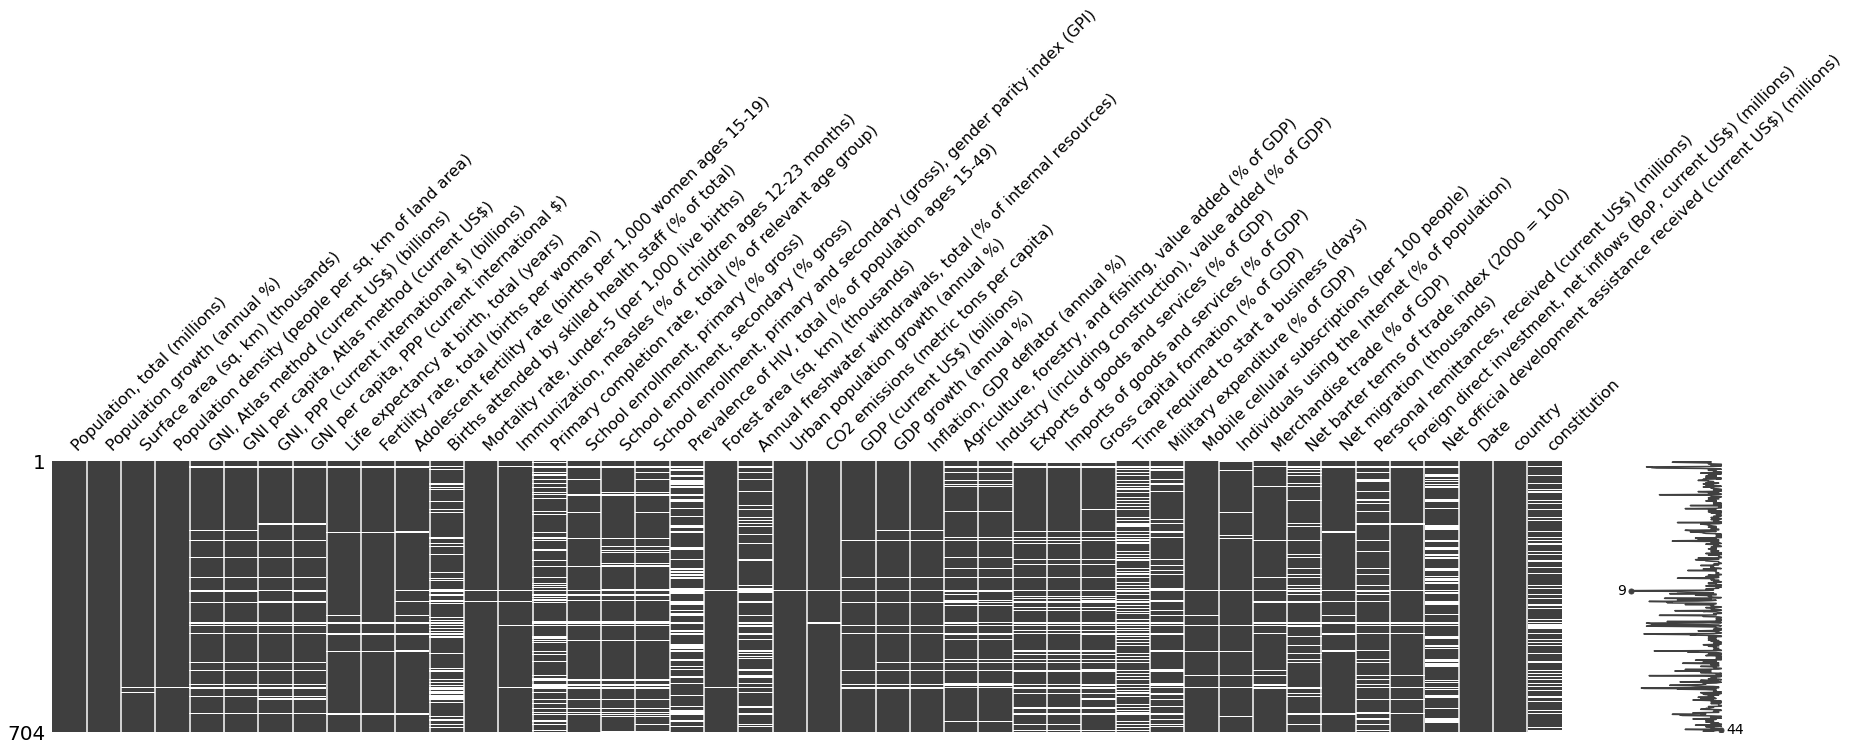

In [5]:
# How many missing values are there in our dataset?
missingno.matrix(df, figsize = (30,5))

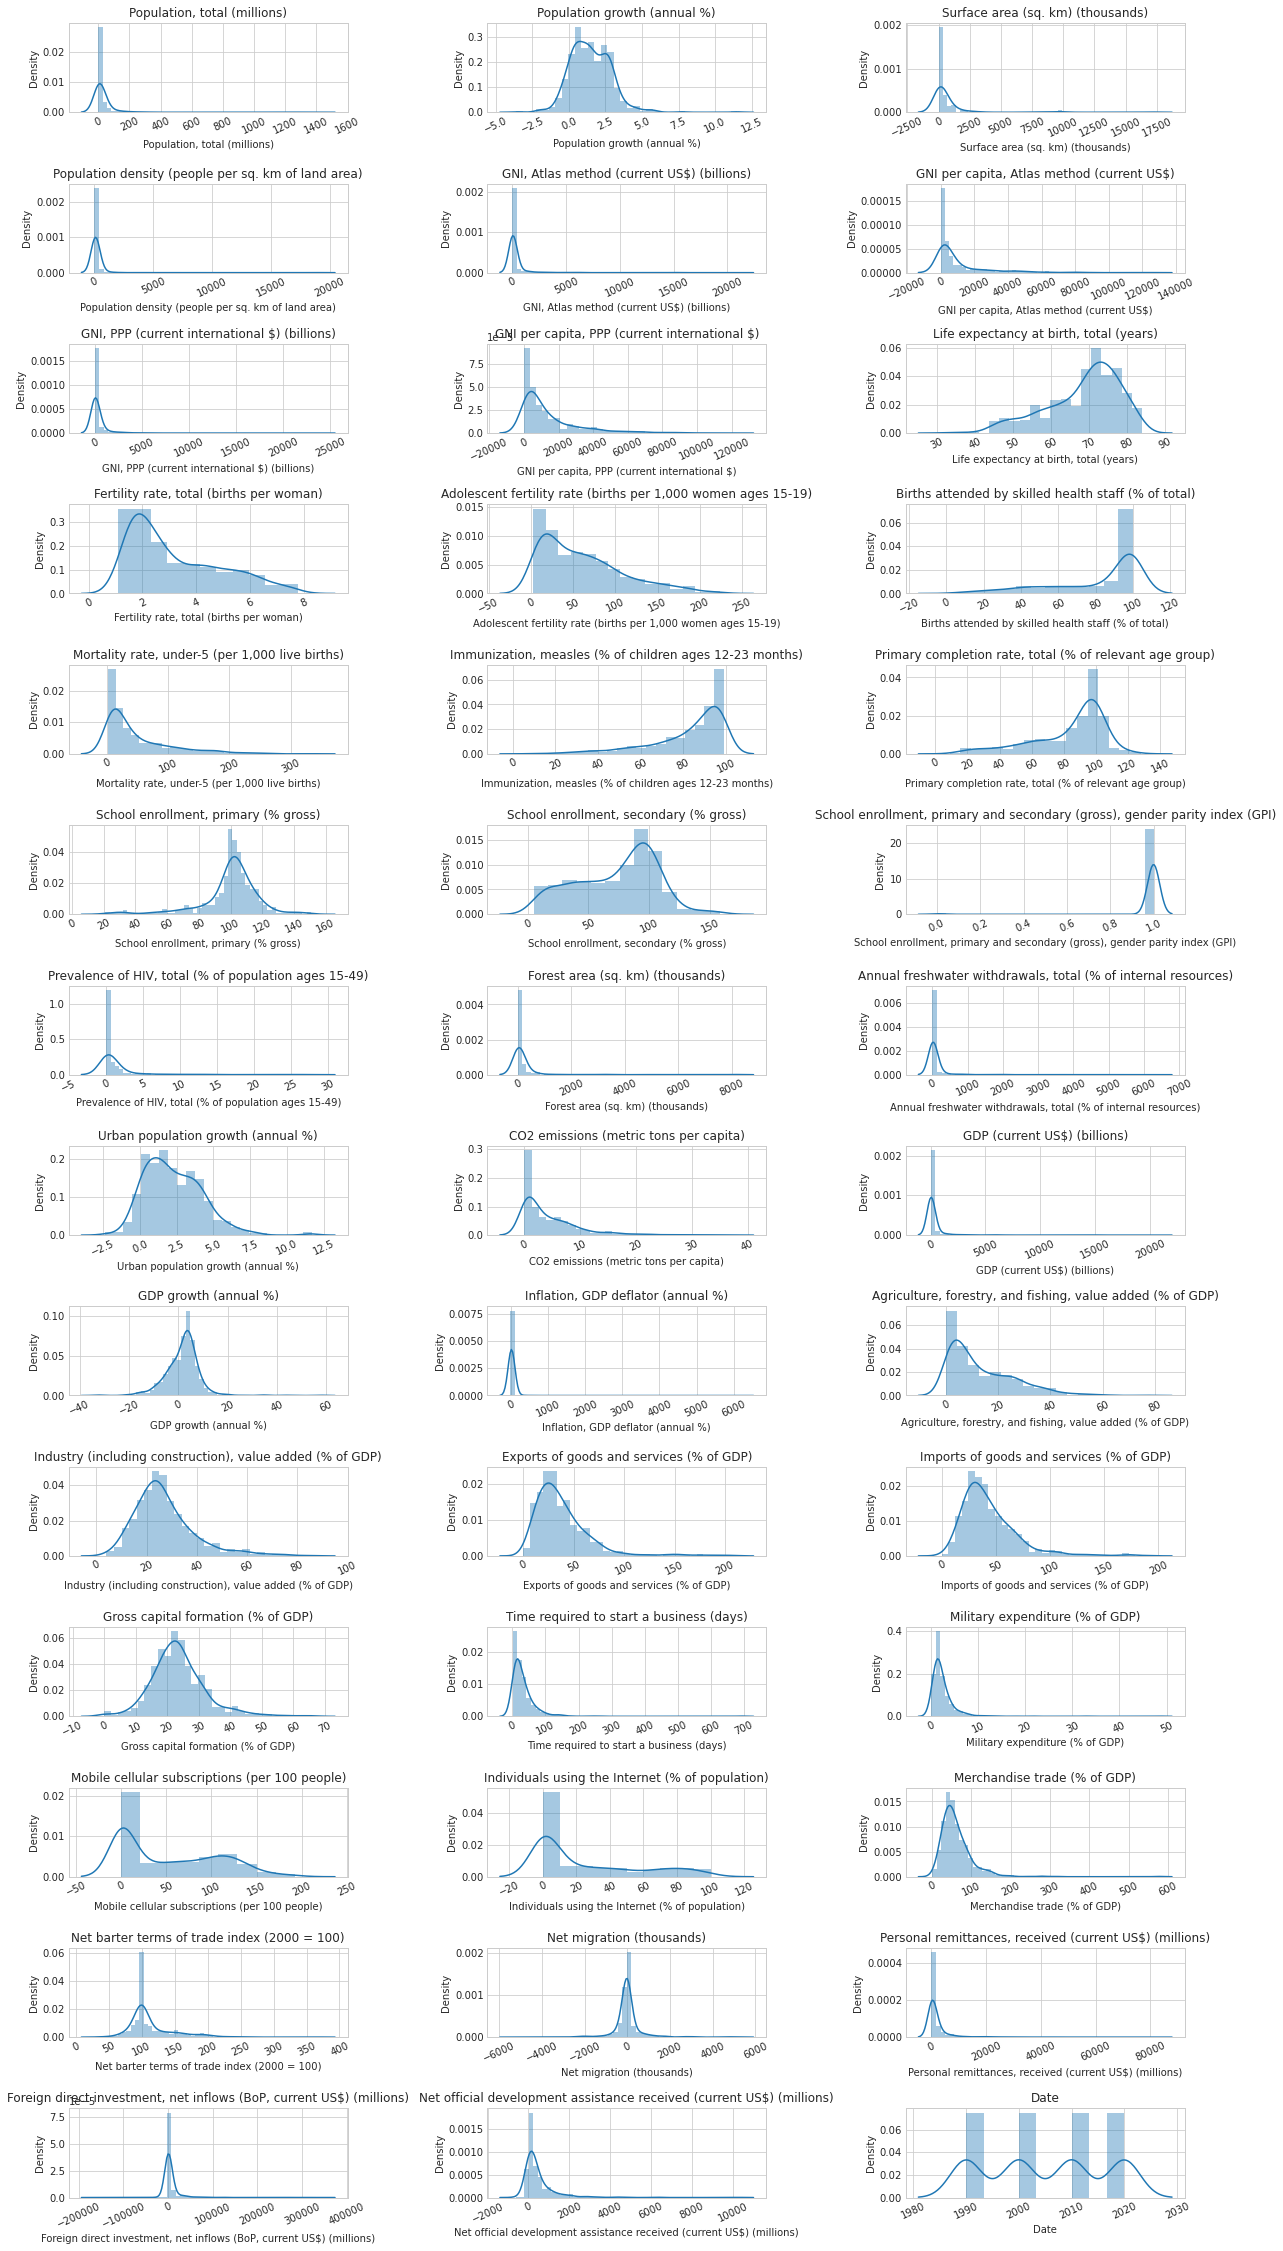

In [16]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df.iloc[:,:42], cols=3, width=20, height=40, hspace=0.8, wspace=0.5)
